# Найкраща відповідь

---

## Визначення найкращої відповіді

В грі двох учасників $(A,B)\in{\mathbb{R}^{m\times n}}^2$ змішана стратегія $\sigma_1^*$  першого гравця є найкращою відповіддю на стратегію другого гравця $\sigma_2$ iff, якщо:

$$
\sigma_1^*=\text{argmax}_{\sigma_1\in S_1}\sigma_1A\sigma_2^T.
$$

Аналогічно, змішана стратегія $\sigma_2^*$ другого гравця є найкращою відповіддю на стратегію першого гравця $\sigma_1$ тоді і тільки тоді, коли:

$$
\sigma_2^*=\text{argmax}_{\sigma_2\in S_2}\sigma_1B\sigma_2^T.
$$

---

Іншими словами: найкраща відповідь максимізує корисність гравця для заданої стратегії іншого гравця.

## Найкращі відповіді в Дилемі ув'язеного

Розглянемо ДУ:

$$
A = \begin{pmatrix}
3 & 0\\
5 & 1
\end{pmatrix}\qquad
B = \begin{pmatrix}
3 & 5\\
0 & 1
\end{pmatrix}
$$

знаходимо найкращі відповіді для одного

$$
A = \begin{pmatrix}
3 & 0\\
\underline{5} & \underline{1}
\end{pmatrix}
$$

та іншого гравця

$$
B = \begin{pmatrix}
3 & \underline{5}\\
0 & \underline{1}
\end{pmatrix}
$$

Очевидно, що для кожного гравця найкраща відповідь - це друга стратегія.

## Найкращі відповіді в орлянці

Розглянемо найкращі відповіді в цій грі 

$$
A = \begin{pmatrix}
\underline{1} & -1\\
-1 & \underline{1}
\end{pmatrix}\qquad
B = \begin{pmatrix}
-1 & \underline{1}\\
\underline{1} & -1
\end{pmatrix}
$$

Тепер найкращі відповіді суттєво залежать від дій опонента. Тепер припустимо, що гравці використовують змішані стратегії:

- Нехай $\sigma_1=(x,1-x)$
- Нехай $\sigma_2=(y,1-y)$

Отримуємо результат:

$$
A\sigma_c^T = \begin{pmatrix}
2y-1\\
1-2y
\end{pmatrix}\qquad
\sigma_rB = \begin{pmatrix}
1-2x & 2x-1
\end{pmatrix}
$$

In [1]:
import sympy as sym
import numpy as np
sym.init_printing()

x, y = sym.symbols('x, y')
A = sym.Matrix([[1, -1], [-1, 1]])
B = - A
sigma_r = sym.Matrix([[x, 1-x]])
sigma_c = sym.Matrix([y, 1-y])
A * sigma_c, sigma_r * B


⎛⎡2⋅y - 1⎤                    ⎞
⎜⎢       ⎥, [1 - 2⋅x  2⋅x - 1]⎟
⎝⎣1 - 2⋅y⎦                    ⎠

Ці два вектори є корисностями кожного гравця коли вони грають у відповідь на змішану стратегію суперника одну з своїх чистих стратегій.

- $(A\sigma_c^T)_i$ це виграш гравця 1, коли він грає $i$ проти $\sigma_c=(y, 1-y)$
- $(\sigma_rB)_j$ це виграш гравця 2, коли він грає $j$ проти $\sigma_r=(x, 1-x)$

Нанесемо їх на графік (використовуючи `matplotlib`):

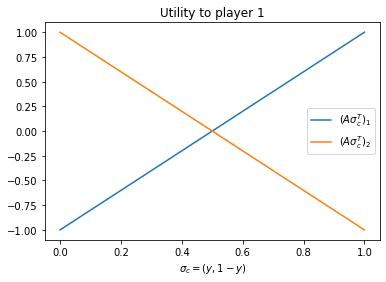

In [2]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("savefig", dpi=100)  

ys = [0, 1]
row_us = [[(A * sigma_c)[i].subs({y: val}) for val in ys] for i in range(2)]
plt.plot(ys, row_us[0], label="$(A\sigma_c^T)_1$")
plt.plot(ys, row_us[1], label="$(A\sigma_c^T)_2$")
plt.xlabel("$\sigma_c=(y, 1-y)$")
plt.title("Utility to player 1")
plt.legend();

Отже найкращі відповіді на змішані стратегії визначаються наступним чином:

$$
\sigma_r^* = 
\begin{cases}
(1, 0),&\text{ if } y > 1/2\\
(0, 1),&\text{ if } y < 1/2\\
\text{indifferent},&\text{ if } y = 1/2
\end{cases}
\qquad
\sigma_c^* = 
\begin{cases}
(0, 1),&\text{ if } x > 1/2\\
(1, 0),&\text{ if } x < 1/2\\
\text{indifferent},&\text{ if } x = 1/2
\end{cases}
$$

В даному випадку ми бачимо, що для кожної заданої стратегії найкраща відповідь це або чиста стратегія або змішана стратегія в випадку, коли виграші від чистих стратегій однакові. 

Наприклад:

- Якщо $\sigma_c=(1/4, 3/4)$ ($y=1/4$) то найкраща відповідь дорівнює $\sigma_r^*=(0,1)$
- Якщо $\sigma_c=(1/2, 1/2)$ ($y=1/2$) то будь-яка змішана стратегія - це найкраща відповідь, **але** фактично обидві чисті стратегії дають однаковий виграш (там де лінії перетинаються).


---

##  Умови найкращої відповіді


У грі двох гравців $(A,B)\in{\mathbb{R}^{m\times n}}^2$ змішана стратегія $\sigma_r^*$  першого гравця є найкращою відповіддю на стратегію другого гравця $\sigma_c$ ттк:

$${\sigma_r^*}_i > 0 \Rightarrow (A\sigma_c^T)_i = \max_{k}(A\sigma_c^T)_k\text{ for all }1\leq i\leq m$$

### Доведення

Нехай $(A\sigma_c^T)_i$ - це виграш першого гравця, коли він грає свою  $i$-ту стратегію. Тоді:

$$\sigma_rA\sigma_c^T=\sum_{i=1}^{m}{\sigma_r}_i(A\sigma_c^T)_i$$

Нехай $u=\max_{k}(A\sigma_c^T)_k$. Тоді:

$$
\begin{align}
\sigma_rA\sigma_c^T&=\sum_{i=1}^{m}{\sigma_r}_i(u - u + (A\sigma_c^T)_i)\\
                   &=\sum_{i=1}^{m}{\sigma_r}_iu - \sum_{i=1}^{m}{\sigma_r}_i(u - (A\sigma_c^T)_i)\\
                   &=u - \sum_{i=1}^{m}{\sigma_r}_i(u - (A\sigma_c^T)_i)
\end{align}$$

Ми знаємо, що $u - (A\sigma_c^T)_i\geq 0$, тому найбільше $\sigma_rA\sigma_c^T$ можливо для $u$ рівного $(A\sigma_c^T)_i)$, як і вимагалось довести.

---

Повертаючись до нашого прикладу. Якщо $\sigma_c=(1/2, 1/2)$, $(A\sigma_c^T)=(0, 0)$, то $(A\sigma_c^T)_i = 0$ для всіх $i$.

Зауважимо, що хоча кожна стратегія є найкращою відповіддю на $(1/2, 1/2)$ пара стратегій $(\sigma_r, \sigma_c) = ((1/2, 1/2), (1/2, 1/2))$ є єдиною парою стратегій, які найкраща відповідь одна на одну. Цей зв'язок і називають  **Рівновагою Неша**.

## Визначення рівноваги Неша

В грі двох учасників $(A,B)\in{\mathbb{R}^{m\times n}}^2$, $(\sigma_r, \sigma_c)$ є рівновагою Неша якщо  $\sigma_r$ - найркаща відповідь на $\sigma_c$ і навпаки.

## Задачі для роботи в класі

1. Two players have 10 euros to divide between themselves. To do so, they use the following procedure: each player names a number of Euros (a non-negative integer), at most equal to 10. If the sum of the two numbers is at most 10 then each player receives the amount of money she names (and the remainder is destroyed). If the sum of the numbers exceeds 10 and the two numbers are different then the player who names the smaller number receives that amount and the other player receives the remaining money. If the sum of the numbers exceeds 10 and the two numbers are equal each player receives 5 Euros. Determine the best-reply correspondence of each player, plot them in a diagram, and find the Nash equilibria of the game.
2. Each of two firms has one job opening. Suppose that (for reasons not discussed here but relating to the value of filling each opening) the firms offer different wages: firm 𝑖 offers the wage 𝑤1,where 1 𝑤1 < 𝑤2 < 2𝑤1. Imagine that there are two workers, each of whom can apply to only one firm. 2 The workers simultaneously decide whether to apply to firm 1 or to firm 2. If only one worker applies to a given firm, that worker gets the job; if both workers apply to one firm, the firm hires one worker at random and the other worker is unemployed (which has a payoff of zero).
    a. Represent the workers’ normal form game.
    b. Solve for the Nash equilibria (in pure strategies) of the game obtained in (a).
3. Cops and Robbers: Player 1 is a police officer who must decide whether to patrol the streets or to hang out at the coffee shop. His payoff from hanging out at the coffee shop is 10, while his payoff from patrolling the streets depends on whether he catches a robber, who is player 2. If the robber prowls the streets then the police officer will catch him and obtain a payoff of 20. If the robber stays in his hideaway then the officer’s payoff is 0. The robber must choose between staying hidden or prowling the streets. If he stays hidden then his payoff is 0, while if he prowls the streets his payoff is −10 if the officer is patrolling the streets and 10 if the officer is at the coffee shop.
    a. Write down the matrix form of this game.
    b. Draw the best-response function of each player.
    c. Find the Nash equilibrium of this game. What kind of game does this game remind you of?
4. Market Entry: Three firms are considering entering a new market. The payoff for each firm that enters is 150/n , where n is the number of firms that enter. The cost of entering is 62
    a. Find all the pure-strategy Nash equilibria.
    b. Find the symmetric mixed-strategy equilibrium in which all three players enter with the same probability.

In [9]:
import sympy as sym
import numpy as np
sym.init_printing()

x, y = sym.symbols('x, y')
A = sym.Matrix([[10, -10], [5, 0]])
B = sym.Matrix([[10, 5], [-5, 0]])
sigma_r = sym.Matrix([[x, 1-x]])
sigma_c = sym.Matrix([y, 1-y])
A * sigma_c, sigma_r * B


⎛⎡20⋅y - 10⎤                 ⎞
⎜⎢         ⎥, [15⋅x - 5  5⋅x]⎟
⎝⎣   5⋅y   ⎦                 ⎠

⎡20⋅y - 10⎤
⎢         ⎥
⎣   5⋅y   ⎦

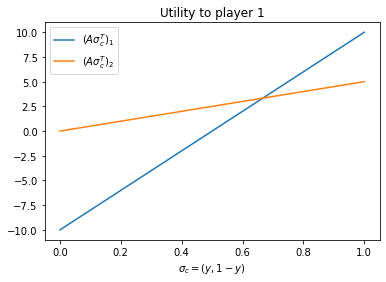

In [18]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("savefig", dpi=100)  

ys = [0, 1]
row_us = [[(A * sigma_c)[i].subs({y: val}) for val in ys] for i in range(2)]
plt.plot(ys, row_us[0], label="$(A\sigma_c^T)_1$")
plt.plot(ys, row_us[1], label="$(A\sigma_c^T)_2$")
plt.xlabel("$\sigma_c=(y, 1-y)$")
plt.title("Utility to player 1")
plt.legend();
(A * sigma_c)

In [24]:
sigma_r * B
xs = [0, 1]
row_us = [[(sigma_r * B)[i].subs({x: val}) for val in ys] for i in range(2)]
row_us

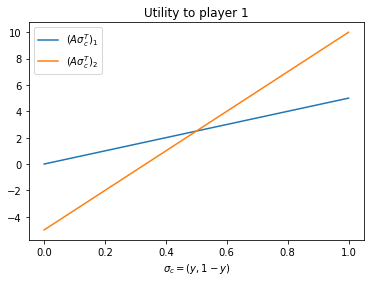

In [25]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
matplotlib.rc("savefig", dpi=100)  

xs = [0, 1]
row_us = [[(sigma_r * B)[i].subs({x: val}) for val in ys] for i in range(2)]
plt.plot(xs, row_us[1], label="$(A\sigma_c^T)_1$")
plt.plot(xs, row_us[0], label="$(A\sigma_c^T)_2$")
plt.xlabel("$\sigma_c=(y, 1-y)$")
plt.title("Utility to player 1")
plt.legend();

In [40]:
import nashpy as nash
A = sym.Matrix([[1, -1], [-1, 1]])
B = - A
game = nash.Game(A, B)
game

Zero sum game with payoff matrices:

Row player:
[[1 -1]
 [-1 1]]

Column player:
[[-1 1]
 [1 -1]]

In [44]:
A = np.array([[0.6, 1], [0.8, 0.4]])
B = np.array([[0.4, 0], [0.2, 0.6]])
game = nash.Game(A, B)
list(game.support_enumeration())

[(array([0.5, 0.5]), array([0.75, 0.25]))]

In [38]:
game.lemke_howson(initial_dropped_label=0)
for eq in game.lemke_howson_enumeration():
    print(eq)
    

(array([1.00000000000000, 0], dtype=object), array([1.00000000000000, 0], dtype=object))
(array([0, 1.00000000000000], dtype=object), array([0, 1.00000000000000], dtype=object))
(array([1.00000000000000, 0], dtype=object), array([1.00000000000000, 0], dtype=object))
(array([0, 1.00000000000000], dtype=object), array([0, 1.00000000000000], dtype=object))
